https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021  

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/Users/user/Downloads/us_tornado_dataset_1950_2021.csv')

Выберем интересующие столбцы из датасета для дальнейшей работы

In [21]:
df_numeric = df.iloc[:,5:14]

Добавим к датасету новый атрибут size = len * wid, т.е. условно найдем весь размер области, затронутой торнадо

In [22]:
df_numeric['size'] = df_numeric['wid']*df_numeric['len']


"Причешем" датасет: удалим выбросы и т.п.
    Для удаления выбросов воспользуемся способов из 1 л/р.
    Но для начала удалим пропущенные значения, известные из датасета:
    1)mag(-9 if unknown rating)
    2)elat, elon(value of 0 if missing)

In [23]:
df_numeric = df_numeric.loc[(df_numeric['mag'] != -9) & (df_numeric['elat'] != 0) & (df_numeric['elon'] != 0)]

In [24]:
Q1 = df_numeric.quantile(q=.25)
Q3 = df_numeric.quantile(q=.75)
IQR = df_numeric.apply(stats.iqr)
df_clean = df_numeric[~((df_numeric < (Q1-1.5*IQR)) | (df_numeric > (Q3+1.5*IQR))).any(axis=1)]
df_clean

mag  inj  fat     slat     slon     elat     elon    len  wid   size
12       2    0    0  33.2700 -92.9500  33.3500 -92.9500   5.70  100  570.0
19       1    0    0  32.0800 -98.3500  32.1000 -98.3300   2.30  233  535.9
21       2    0    0  31.5200 -96.5500  31.5700 -96.5500   3.40  100  340.0
37       2    0    0  40.5700 -88.6000  40.6000 -88.5500   3.00   50  150.0
41       2    0    0  33.1300 -89.5700  33.2500 -89.4200  11.90   10  119.0
...    ...  ...  ...      ...      ...      ...      ...    ...  ...    ...
67550    1    0    0  34.3022 -84.4754  34.3012 -84.4673   0.48  100   48.0
67552    1    0    0  31.1087 -83.7293  31.1184 -83.6658   3.82  150  573.0
67553    1    0    0  31.1703 -83.3804  31.1805 -83.3453   2.19  150  328.5
67555    1    0    0  34.2875 -85.7878  34.2998 -85.7805   0.95   50   47.5
67556    1    0    0  33.7372 -84.9998  33.7625 -84.9633   2.75  150  412.5

[29284 rows x 10 columns]

После очистки датасета значения inj, fat остались только равные 0. Для удобства дальнейший вычислений я уберу эти два атрибута.

In [25]:
df_clean = df_clean.drop(['inj','fat'], axis = 1)
df_clean

mag     slat     slon     elat     elon    len  wid   size
12       2  33.2700 -92.9500  33.3500 -92.9500   5.70  100  570.0
19       1  32.0800 -98.3500  32.1000 -98.3300   2.30  233  535.9
21       2  31.5200 -96.5500  31.5700 -96.5500   3.40  100  340.0
37       2  40.5700 -88.6000  40.6000 -88.5500   3.00   50  150.0
41       2  33.1300 -89.5700  33.2500 -89.4200  11.90   10  119.0
...    ...      ...      ...      ...      ...    ...  ...    ...
67550    1  34.3022 -84.4754  34.3012 -84.4673   0.48  100   48.0
67552    1  31.1087 -83.7293  31.1184 -83.6658   3.82  150  573.0
67553    1  31.1703 -83.3804  31.1805 -83.3453   2.19  150  328.5
67555    1  34.2875 -85.7878  34.2998 -85.7805   0.95   50   47.5
67556    1  33.7372 -84.9998  33.7625 -84.9633   2.75  150  412.5

[29284 rows x 8 columns]

Также удалим дубликаты:

In [26]:
df_clean.drop_duplicates()

mag     slat     slon     elat     elon    len  wid   size
12       2  33.2700 -92.9500  33.3500 -92.9500   5.70  100  570.0
19       1  32.0800 -98.3500  32.1000 -98.3300   2.30  233  535.9
21       2  31.5200 -96.5500  31.5700 -96.5500   3.40  100  340.0
37       2  40.5700 -88.6000  40.6000 -88.5500   3.00   50  150.0
41       2  33.1300 -89.5700  33.2500 -89.4200  11.90   10  119.0
...    ...      ...      ...      ...      ...    ...  ...    ...
67550    1  34.3022 -84.4754  34.3012 -84.4673   0.48  100   48.0
67552    1  31.1087 -83.7293  31.1184 -83.6658   3.82  150  573.0
67553    1  31.1703 -83.3804  31.1805 -83.3453   2.19  150  328.5
67555    1  34.2875 -85.7878  34.2998 -85.7805   0.95   50   47.5
67556    1  33.7372 -84.9998  33.7625 -84.9633   2.75  150  412.5

[29156 rows x 8 columns]

Построим графики зависимости одной переменной от другой.
   Я буду использовать копию датасета, чтобы графики между собой не повторялись (это упростит разделение по группам и, в целом, визуально понятнее)


	Scatter plot


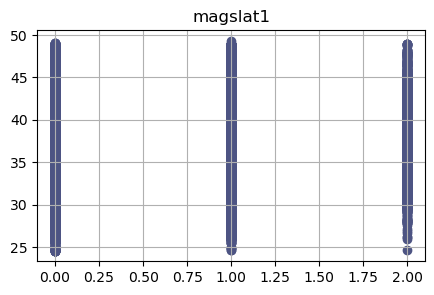

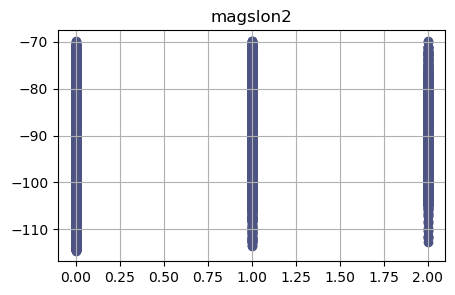

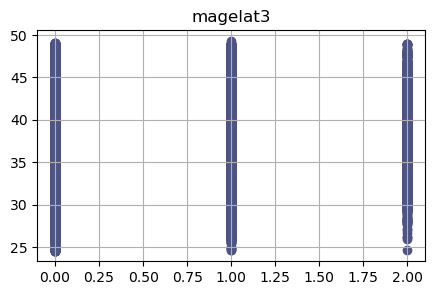

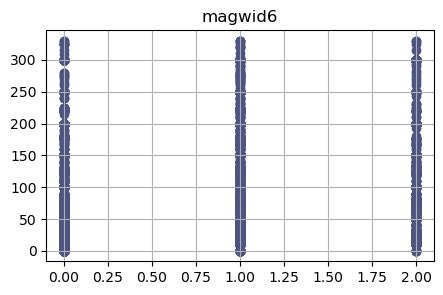

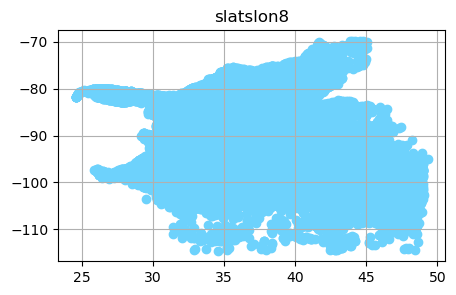

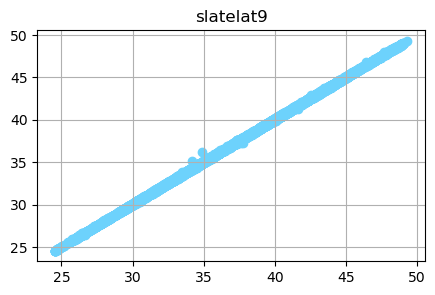

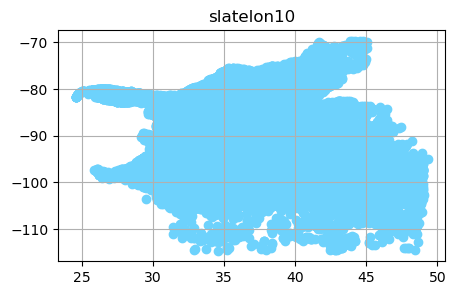

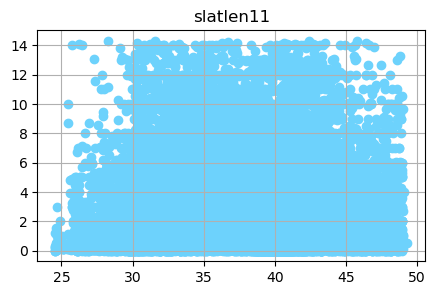

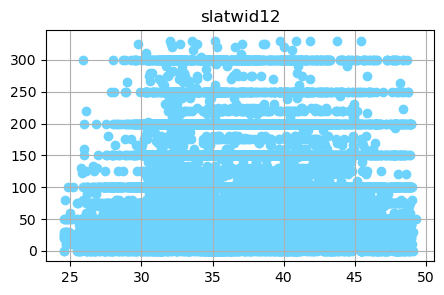

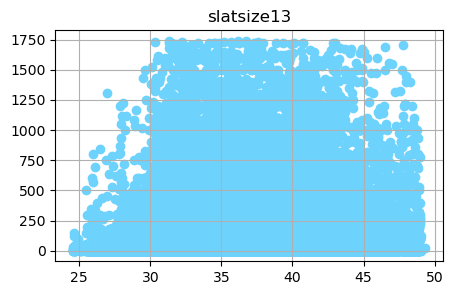

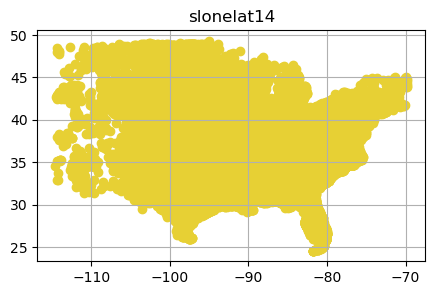

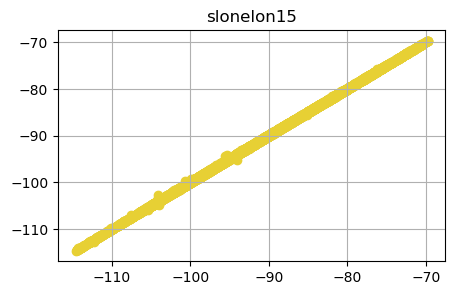

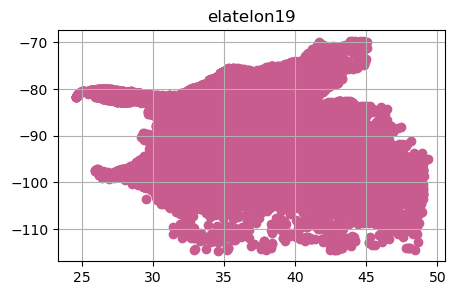

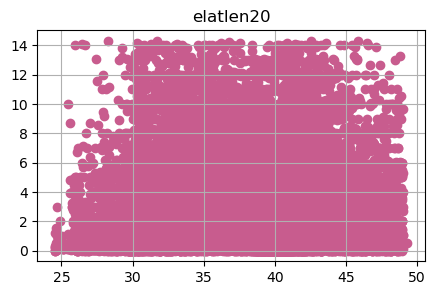

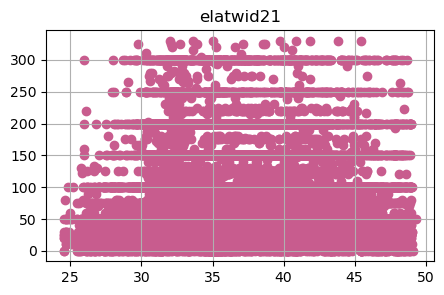

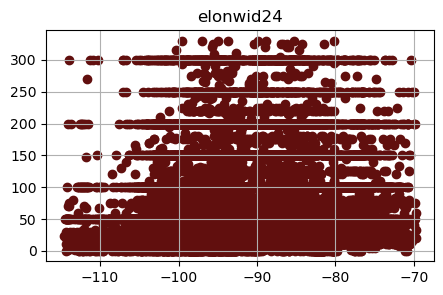

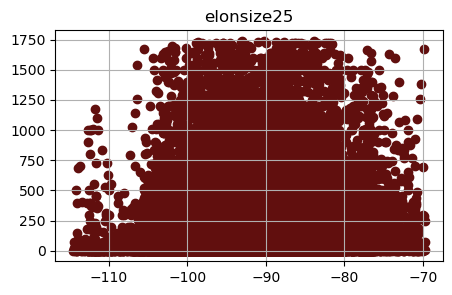

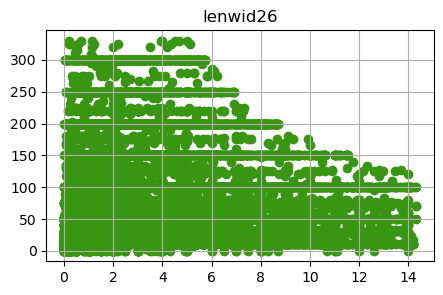

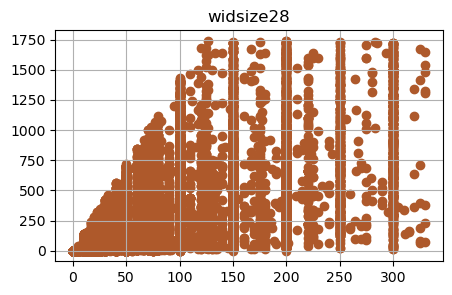

In [27]:
df_additional = df_clean
print("\tScatter plot")
count = 1
for main_atr in df_clean:
    color=np.random.rand(3)
    df_additional = df_additional.drop([main_atr], axis = 1)
    for atr in df_additional:
        if atr != main_atr:
            plt.figure(figsize = (5,3))
            plt.scatter(x=df_clean[main_atr], y=df_clean[atr], c = color)
            plt.grid(True)
            plt.title(main_atr + atr + str(count))
            count += 1

Чисто визуально я могу разделить полученные графики на такие группы:
    1,2,3,4,5,6,7; - ярковыраженная
    8,10,19,14;
    9,15; - ярковыраженная
    11,13, 16,18,20,22,23,25;
    12,17,21,24, 26;
    27,28; - ярковыраженная
    

Применим метод KMeans к датасету. Для этого сначала найдем оптимальное количество кластеров.
    Сначала нормализуем данные.

In [31]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_clean)
minmax_processed.shape

(29284, 8)

In [32]:
df_clean_num = pd.DataFrame(minmax_processed, index=df_clean.index, columns=df_clean.columns)

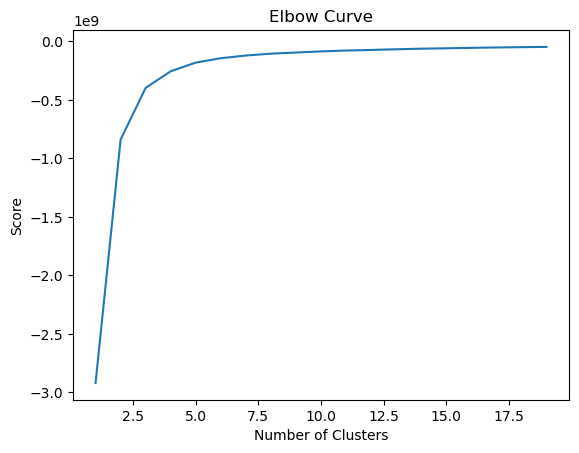

In [216]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Из графика видно, что число кластеров находится между 4 и 5. Пусть число кластеров равняется 4.

In [52]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df_clean_num)
df_clean_num['cluster'] = kmeans.labels_
df_clean_num.head()

mag      slat      slon      elat      elon       len       wid      size  \
12  1.0  0.351897  0.482904  0.355125  0.482183  0.398045  0.303030  0.327586   
19  0.5  0.303874  0.362457  0.304681  0.362361  0.160615  0.706061  0.307989   
21  1.0  0.281275  0.402606  0.283293  0.402004  0.237430  0.303030  0.195402   
37  1.0  0.646489  0.579931  0.647700  0.580178  0.209497  0.151515  0.086207   
41  1.0  0.346247  0.558295  0.351090  0.560802  0.831006  0.030303  0.068391   

    cluster  
12        3  
19        3  
21        0  
37        0  
41        0

Таким образом, была проведена кластеризация, а номер кластера добавлен в новый столбец. Можно также посмотреть распределение данных по кластерам в среднем.

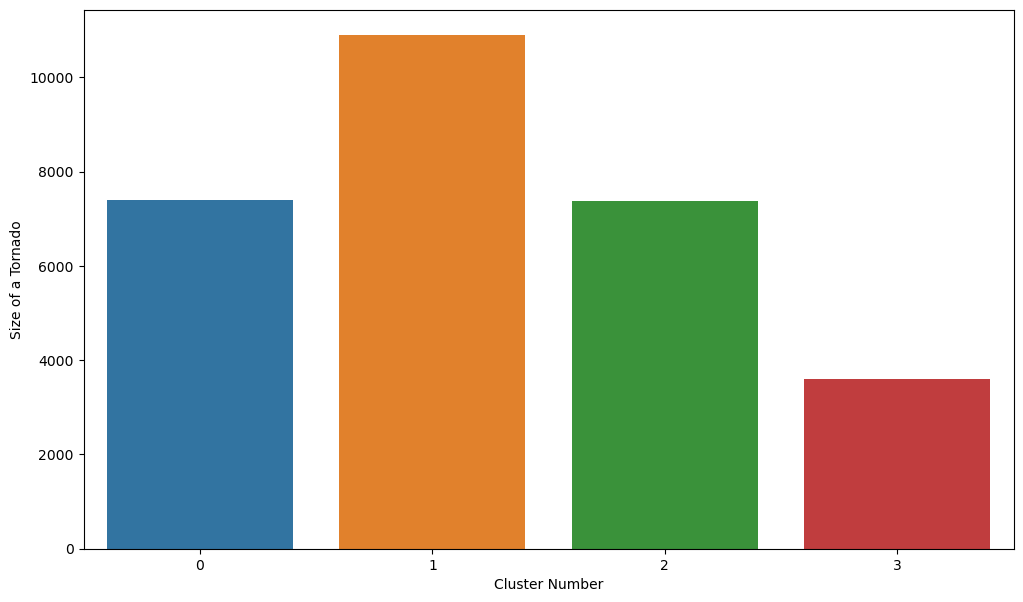

In [53]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,4,1),y=df_clean_num.groupby(['cluster']).count()['size'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Size of a Tornado")

In [51]:
df_clean_num.groupby(['cluster']).mean()

mag      slat      slon      elat      elon       len       wid  \
cluster                                                                         
0        0.030898  0.729189  0.393003  0.729371  0.392740  0.080644  0.125319   
1        0.002341  0.390228  0.529952  0.390493  0.529452  0.089282  0.162007   
2        0.578055  0.493233  0.556184  0.493825  0.556085  0.184779  0.232931   
3        0.609449  0.527818  0.518059  0.529337  0.519238  0.467324  0.479271   

             size  
cluster            
0        0.033758  
1        0.047824  
2        0.095242  
3        0.497611

Видно, что третий кластер, который является самым маленьким, включает в себя торнадо наибольшего размера и наибольшего F-rating.
В свою очередь первый кластер, являющийся самым большим, состоит из торнадо с наименьшим F-rating и наименьшей начальной/конечной широтой.
0 кластер отличается максимальной начальной/конечной широтой в градусах и наименьим размером.
Во 2 кластер включены торнадо с наибольшей начальной/конечной долготой в градусах.